In [28]:
%matplotlib inline
from urllib import quote_plus
import scipy
import pandas as pd
import seaborn as sns

# Graphing GRU data from the Gainesville data portal

This notebook is a simple example of retrieving and working with data from the 
City of Gainesville Floida's [open data portal](https://data.cityofgainesville.org/).
This site makes data availible through the [Socrata](https://socrata.com/) software service. Documentation for working with the Socrata API is on their [developer site](https://dev.socrata.com/consumers/getting-started.html).

One of the datasets that Gainesville makes availible is the monthy electricity usage from the [Gainesville Regional Utilities](http://www.gru.com/) billing records for every property in town. This data is part of the public record.

Let's download the data for one address and graph it over time with the [Seaborn library](https://seaborn.pydata.org/) taught in the [UF](http://www.ufl.edu/) [Data Science and Informatics student group's](http://www.dsiufl.org/) [DataViz workshop](https://github.com/dsiufl/DataViz).

## Retrieve the data

The code below is the simplest way to get data. It relies on you finding a dataset identifier and experimenting with constucting URLs after reading the [Socrata getting started](https://dev.socrata.com/consumers/getting-started.html) page.

There are libraries for Python that will work with Socrata without this manual work. Refer to their [list of libraries](https://dev.socrata.com/libraries/).

In [29]:
# Each Socrata dataset has a unique identifier. This is the one for Gainesville's
# electricity usage. You can see this identifier in the URL when browsing the 
# datasets on the data.gainesville.com web site.
data_set_id = "gk3k-9435"

# Enter a street address to retrieve the electricity usage of. The string
# is quoted for use in a URL
address = quote_plus("2001 NW 21ST ST")

# Build the URL that refers to the electricity data for the address.
api_url = ("https://data.cityofgainesville.org/resource/{0}.json?serviceaddress={1}"
    .format(data_set_id, address))

# The URL above returns JSON data which the Pandas library will automatically
# parse into a dataframe
gru_data = pd.read_json(api_url)

In [30]:
# Look at the first three rows of the data returned
gru_data.head(3)

,date,kwh_consumption,location_1,month,servcity,serviceaddress,year
0,2014-01-31,655,"{u'latitude': u'29.671619', u'needs_recoding':...",January,GAINESVILLE,2001 NW 21ST ST,2014
1,2015-01-31,801,"{u'latitude': u'29.671619', u'needs_recoding':...",January,GAINESVILLE,2001 NW 21ST ST,2015
2,2013-01-31,484,"{u'latitude': u'29.671619', u'needs_recoding':...",January,GAINESVILLE,2001 NW 21ST ST,2013


In [31]:
# Examine the data types of the dataframe
gru_data.dtypes

date               datetime64[ns]
kwh_consumption             int64
location_1                 object
month                      object
servcity                   object
serviceaddress             object
year                        int64
dtype: object

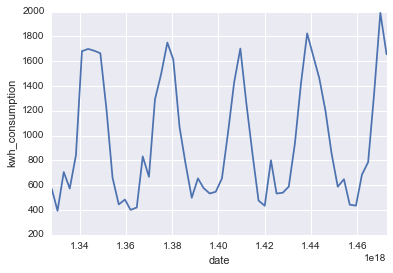

In [32]:
# Graph the electricity consumption over time
fig = sns.tsplot(data=gru_data, time="date", value="kwh_consumption", estimator=scipy.stats.nanmean)

In the above call to Seaborn's tsplot function, changing the estimator to the scipy.stats.nanmean function allows Seaborn to
calculate averages at each date without having to clean our data. The [tsplot](https://seaborn.pydata.org/generated/seaborn.tsplot.html#seaborn.tsplot) function
is designed to average multiple values at each time period; in our example data we
only have one value but sometimes it is empty.

Reference:

http://stackoverflow.com/questions/29156464/seaborn-tsplot-not-showing-ci-bands